In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [24]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [25]:
from IPython.display import HTML
style  = "<style>svg{width:50% !important; height:70% !important;}</style>"
HTML(style)

In [26]:
titanic_train_data = pd.read_csv('C:/Users/Asus/Desktop/NEURAL_NETWORKS/Specification/SolvingTrees/titanic_info/train.csv')

In [27]:
titanic_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
X = titanic_train_data.drop(['PassengerId', 'Survived', 'Name', 'Cabin'], axis = 1)

In [30]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,S
887,1,female,19.0,0,0,112053,30.0000,S
888,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,male,26.0,0,0,111369,30.0000,C


In [31]:
y = titanic_train_data.Survived

In [32]:
#pd.get_dummies - преобразует строковые данные в числовые для дальнейшего анализа по clf
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
X.isnull().sum()

Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
                   ..
Ticket_W/C 14208    0
Ticket_WE/P 5735    0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Length: 691, dtype: int64

In [34]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [35]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

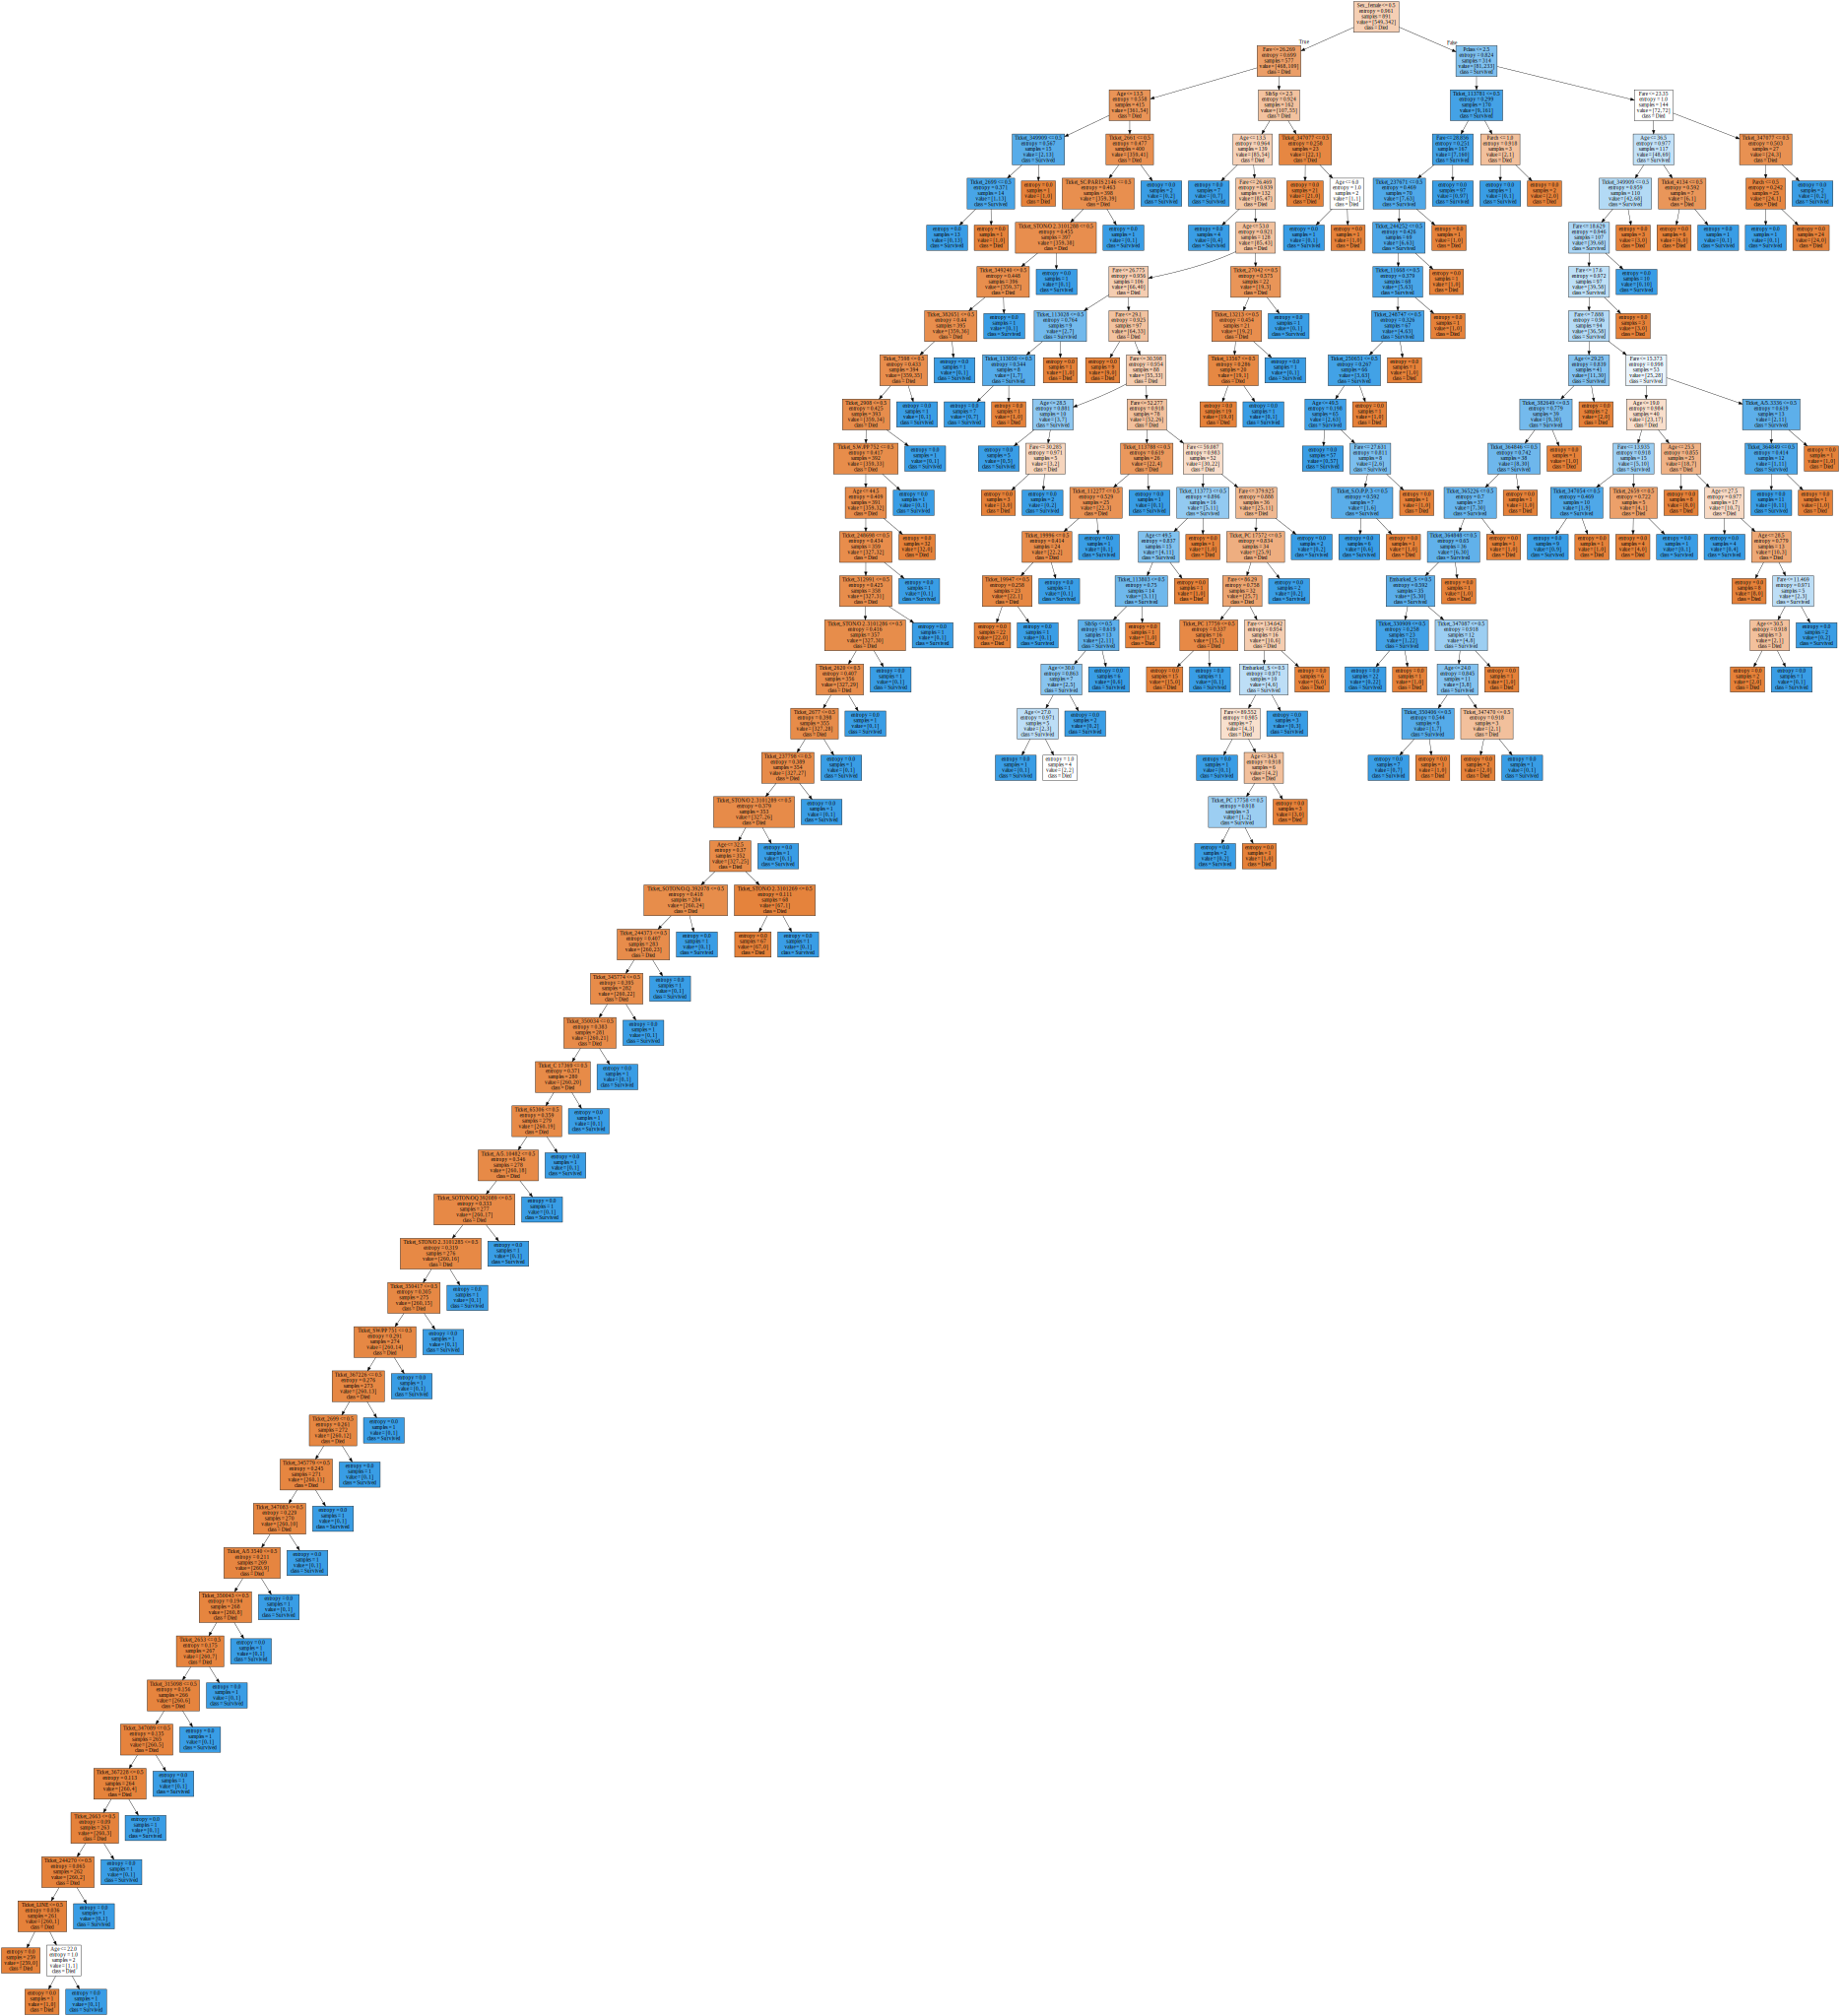

In [36]:
graph = Source(tree.export_graphviz(
                clf, out_file = None,
                feature_names = list(X), class_names = ['Died', 'Survived'],
                filled = True))
display(SVG(graph.pipe(format = 'svg')))

In [ ]:
#Как видим произошел Overfitting of the Model, т.е. переобучение модели 
#Наша модель вместо того, чтобы определить некий паттерн для выживших и невыживших,
#классифицировала именно конкретные данные и разрослась, продолжая разделять данные, пока не получила
#100% результат конкретно для данной выборки, что довольно неправильно, т.к. шаблона мы не выявили
# и не сможем правильно предугадать выживет ли человек или нет в датасете с другими данными

In [ ]:
#Нужно ограничить рост дерева, чтобы как можно меньшими ресурсами, добиться как можно большего результата

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [39]:
X_train.shape

(596, 691)

In [40]:
X_test.shape

(295, 691)

In [41]:
X_train.shape[0] + X_test.shape[0]

891

In [42]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
clf.score(X_test,y_test)

0.8203389830508474

In [44]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [45]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
clf.score(X_train, y_train)

0.8271812080536913

In [47]:
clf.score(X_test, y_test)

0.8169491525423729

In [48]:
max_depth_values = range(1,100)

In [49]:
scores_data = pd.DataFrame()

In [50]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score' : [train_score], 'test_score' : [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [51]:
scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.827181,0.816949
0,4,0.838926,0.823729
0,5,0.850671,0.816949
...,...,...,...
0,95,0.998322,0.827119
0,96,0.998322,0.816949
0,97,0.998322,0.810169
0,98,0.998322,0.803390


In [52]:
scores_data_long = scores_data

In [53]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score'])

In [54]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score'],
                          var_name = 'set_type', value_name = 'score')

In [55]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.827181
3,4,train_score,0.838926
4,5,train_score,0.850671
...,...,...,...
193,95,test_score,0.827119
194,96,test_score,0.816949
195,97,test_score,0.810169
196,98,test_score,0.803390


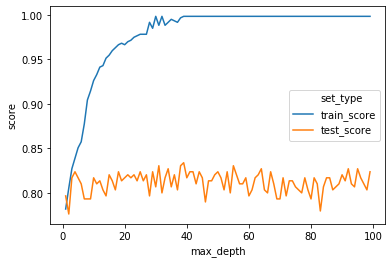

In [56]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [59]:
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

cross_val_score(clf, X_train, y_train, cv = 5).mean()

0.7886079855671083

In [64]:
scores_data = pd.DataFrame()

In [65]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score], 
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [66]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.827181,0.816949,0.790345
0,4,0.838926,0.823729,0.790289
0,5,0.850671,0.816949,0.813720


In [68]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'],
                          var_name = 'set_type', value_name = 'score')

In [69]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.827181
3,4,train_score,0.838926
4,5,train_score,0.850671


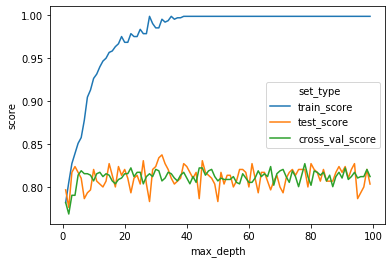

In [73]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [91]:
scores_data_long.query('set_type == "cross_val_score"').sort_values('score', ascending = False)

,max_depth,set_type,score
275,78,cross_val_score,0.827081
264,67,cross_val_score,0.823720
219,22,cross_val_score,0.822166
241,44,cross_val_score,0.822095
242,45,cross_val_score,0.822082
...,...,...,...
284,87,cross_val_score,0.800317
200,3,cross_val_score,0.790345
201,4,cross_val_score,0.790289
198,1,cross_val_score,0.781857


In [79]:
scores_data_long.query('set_type == "cross_val_score"').groupby('set_type').aggregate({'score' : 'max'})

,score
set_type,
cross_val_score,0.827081


In [92]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 78)

In [101]:
cross_val_score(best_clf, X_test, y_test, cv = 5).mean()

0.8271186440677966

In [97]:
train_iris_data = pd.read_csv('C:/Users/Asus/Desktop/NEURAL_NETWORKS/Specification/SolvingTrees/train_iris.csv')

In [98]:
train_iris_data

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...,...
95,147,6.5,3.0,5.2,2.0,2
96,124,6.7,3.3,5.7,2.1,2
97,123,6.3,2.7,4.9,1.8,2
98,146,6.3,2.5,5.0,1.9,2


In [99]:
test_iris_data = pd.read_csv('C:/Users/Asus/Desktop/NEURAL_NETWORKS/Specification/SolvingTrees/test_iris.csv')

In [100]:
test_iris_data

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0
5,125,7.2,3.2,6.0,1.8,2
6,36,5.5,3.5,1.3,0.2,0
7,141,6.9,3.1,5.1,2.3,2
8,12,4.8,3.0,1.4,0.1,0
9,63,6.1,2.9,4.7,1.4,1
